## Problem Statement -
    - This data consists of summer data from 2013 to 2017. 
    - The input data is largely composed of the LDAPS model's next-day forecast data,in-situ maximum and minimum temperature of present-day, and geographic auxiliary variables.
    
    - We need to predict the maximum and minimum air temperatire for next day.

## Input / Features - 

1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9

## Output / Target - 

1. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
2. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

Importing the required Libraries for this project

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

Loading the Dataset

In [2]:
t = pd.read_csv("temperature.csv")
t

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


There are 7752 rows and 25 columns and we can see missing values in the dataset.So we need to deal with missing data's here.

All are numerical columns including our target Varibales and the data is continuous so we are going to build our model in REGRESSION Algorithm's.

This gives the information of the each column's in the given dataset which includes memory usage, data-type of each column, non null count of data's in each column,Index range entries.

As we can see below,all columns are numerical except "Date".

In [3]:
t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


This describes the detailed summary of each and every numerical column which gives the count of the data's, mean, standard-deviation, minimum, maxmium, and quantile range of values.

We can tell clearly that NAN values exist in some columns as count of data is varying from original data vs counted one.

In [4]:
t.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,...,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,...,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,...,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


Next, we will check null values count and which column is having null as we know already that most of the columns has null values.

We can see that target variables also has null values and we can't treat with any impute methods,So we will drop this rows later.

In [5]:
t.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

Next , We will see how the data has been distributed in dataset and we will also see for each column as well,

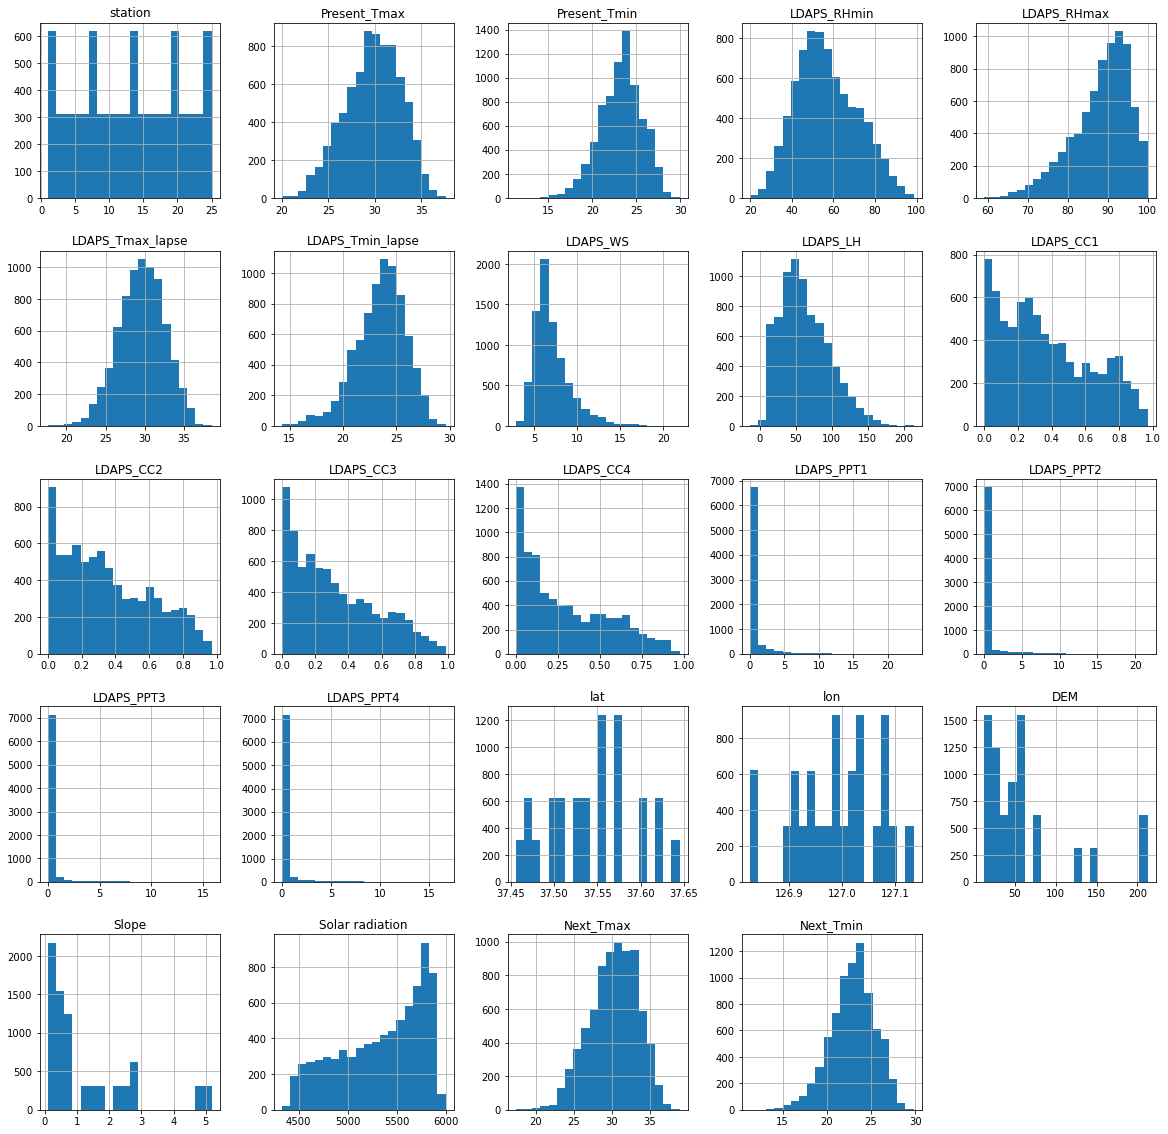

In [6]:
t.hist(bins = 20, figsize = (20,20))
plt.show()

From the above plot,

1) target variables looks normal and have mild skewness
2) LDAPS_RHmax has left skewed data
3) LDAPS_PPT1 to LDAPS_PPT4 has skewed more in right as most of the values are 0 in this as per plot
4) Solar radiation has left skewed
5) LDAPS_CC1 - LDAPS_CC4 has skewness in right side.

Rest of the columns looks fine and we will confirm this with further bar/plot/hist plot of each column.

We will check for target variables on data distribution,

In [7]:
t['Next_Tmax'].value_counts()

29.3    113
33.0    106
31.3    104
29.6    101
31.2     98
       ... 
37.3      1
37.6      1
19.7      1
21.5      1
38.7      1
Name: Next_Tmax, Length: 183, dtype: int64

<AxesSubplot:>

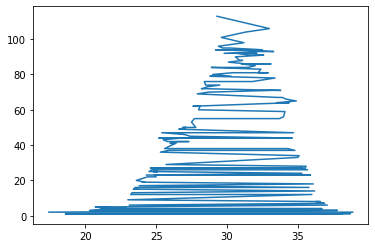

In [8]:
t['Next_Tmax'].value_counts().plot.line()

As per the plot,it looks like that most of the places in seoul has next day maxmium air temperature has (25-30)C to (30-35)C

In [9]:
t['Next_Tmin'].value_counts()

23.5    159
23.4    157
24.0    156
23.2    150
23.8    149
       ... 
29.5      1
13.6      1
13.3      1
13.9      1
12.9      1
Name: Next_Tmin, Length: 157, dtype: int64

<AxesSubplot:>

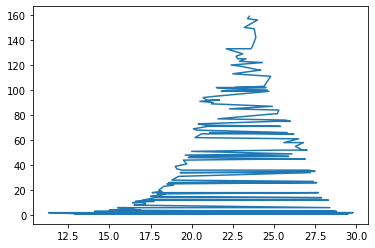

In [10]:
t['Next_Tmin'].value_counts().plot.line()

The next day minimum temperature in south korea varies from 22.5C to 25C in most of the places as per the above plot

In [11]:
t['station'].value_counts()

25.0    310
12.0    310
2.0     310
3.0     310
4.0     310
5.0     310
6.0     310
7.0     310
8.0     310
9.0     310
10.0    310
11.0    310
13.0    310
23.0    310
14.0    310
15.0    310
16.0    310
18.0    310
20.0    310
22.0    310
24.0    310
17.0    310
19.0    310
21.0    310
1.0     310
Name: station, dtype: int64

<AxesSubplot:>

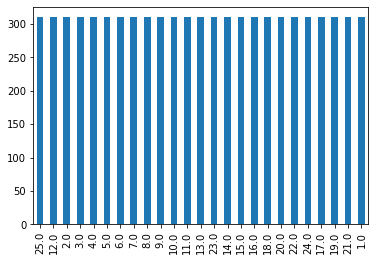

In [12]:
t['station'].value_counts().plot.bar()

This plot shows that we have total 25 stations in Korea Meteorological Administration over Seoul, South Korea as per the problem statement and it is equally distributed.

In [13]:
t['Present_Tmax'].value_counts()

31.4    112
29.4    111
29.1    108
29.7    107
30.6    105
       ... 
36.4      1
20.7      1
20.4      1
20.3      1
21.2      1
Name: Present_Tmax, Length: 167, dtype: int64

<AxesSubplot:>

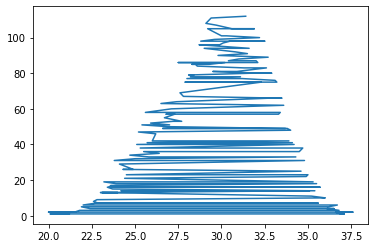

In [14]:
t['Present_Tmax'].value_counts().plot.line()

So, the maximum air temperature for the present day is high of 27.5C to 32.5C in south korea

In [15]:
t['Present_Tmin'].value_counts()

24.0    161
23.8    153
23.1    144
23.5    143
23.3    142
       ... 
13.5      1
15.0      1
13.6      1
14.2      1
29.6      1
Name: Present_Tmin, Length: 155, dtype: int64

<AxesSubplot:>

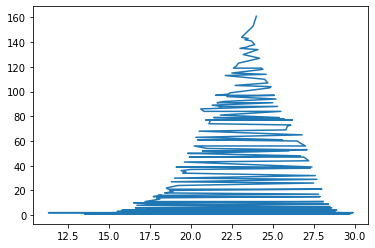

In [16]:
t['Present_Tmin'].value_counts().plot.line()

So the minimum air temperature for the present day range is  22.5C to 25C in South Korea.

In [17]:
t['LDAPS_RHmin'].value_counts()

51.810596    2
71.658089    2
77.030350    2
98.524734    2
19.794666    2
            ..
44.005089    1
58.655628    1
58.761993    1
42.186558    1
71.359451    1
Name: LDAPS_RHmin, Length: 7672, dtype: int64

<AxesSubplot:>

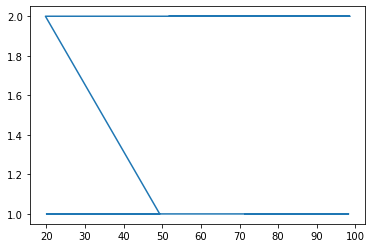

In [18]:
t['LDAPS_RHmin'].value_counts().plot.line()

So the above line plot explains that relative humidity as per LDAPS model states that minimum humidity levels in south korea in summer is of 19% to 98% and we can see the sudden increase from 50% indicates that more places on south korea has humidity of >50%.

In [19]:
t['LDAPS_RHmax'].value_counts()

58.936283    2
96.525200    2
91.776146    2
88.876610    2
92.531029    2
            ..
83.450928    1
91.301826    1
82.626305    1
80.657700    1
83.073624    1
Name: LDAPS_RHmax, Length: 7664, dtype: int64

<AxesSubplot:>

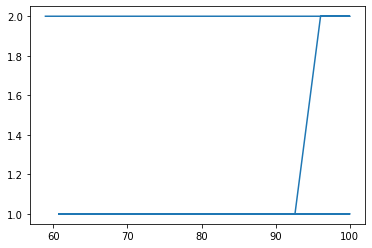

In [20]:
t['LDAPS_RHmax'].value_counts().plot.line()

The above plot explains about relative humidity in south korea in summer where the maximum humidity ranges from 60% to 100% and  the sudden increase from 90% shows that most of the places has maximum of >90% humidity.

In [21]:
t['LDAPS_Tmax_lapse'].value_counts()

17.624954    2
38.542255    2
29.521661    1
32.201413    1
23.508736    1
            ..
30.066939    1
29.181508    1
33.268739    1
29.969835    1
27.149571    1
Name: LDAPS_Tmax_lapse, Length: 7675, dtype: int64

<AxesSubplot:>

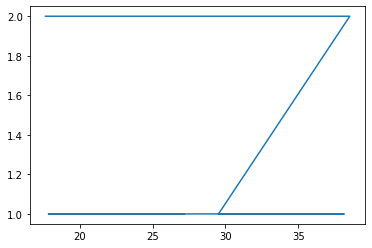

In [22]:
t['LDAPS_Tmax_lapse'].value_counts().plot.line()

In [23]:
t['LDAPS_Tmin_lapse'].value_counts()

14.272646    2
29.619342    2
21.797430    1
25.681776    1
24.143785    1
            ..
22.562532    1
20.332596    1
27.344587    1
25.081030    1
23.197572    1
Name: LDAPS_Tmin_lapse, Length: 7675, dtype: int64

<AxesSubplot:>

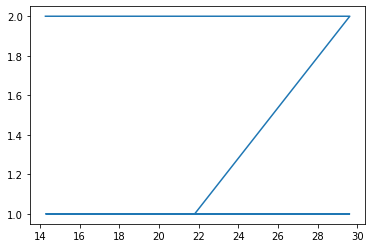

In [24]:
t['LDAPS_Tmin_lapse'].value_counts().plot.line()

The air temperature lapse rate for next day in south korea ranges from 14C to 30C as minimum and maximum lapse rate of >15C to <40C.

The above graph shows that it is varying from place to place and few places has seen the increase maximum lapse rate of 38C and less of 17C and increase minimum lapse rate of 29C and less of 14C.

In [25]:
t['LDAPS_WS'].value_counts()

2.882580     2
21.857621    2
4.633030     1
10.157699    1
5.145232     1
            ..
4.818516     1
13.419236    1
10.352374    1
5.738173     1
8.112974     1
Name: LDAPS_WS, Length: 7675, dtype: int64

<AxesSubplot:>

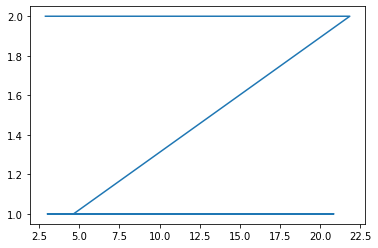

In [26]:
t['LDAPS_WS'].value_counts().plot.line()

Wind speed is varying gradually from place to place and depends on several factors but can see high of 21m/s and less of 2m/s.

In [27]:
t['LDAPS_LH'].value_counts()

-13.603212     2
 213.414006    2
 31.292903     1
 52.898936     1
 58.594891     1
              ..
 10.853051     1
 20.780082     1
 79.438871     1
 78.099351     1
 48.865865     1
Name: LDAPS_LH, Length: 7675, dtype: int64

<AxesSubplot:>

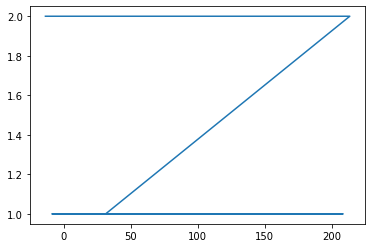

In [28]:
t['LDAPS_LH'].value_counts().plot.line()

Heat flux ranges from <0W/m2 to >200wm2 and we can see some places has heat fluz of >200wm2 as well in south korea.

In [29]:
t['LDAPS_CC1'].value_counts()

0.000000    108
0.967277      2
0.081400      1
0.271888      1
0.051230      1
           ... 
0.001239      1
0.494226      1
0.104894      1
0.281367      1
0.315165      1
Name: LDAPS_CC1, Length: 7569, dtype: int64

<AxesSubplot:>

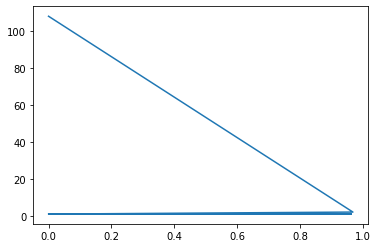

In [30]:
t['LDAPS_CC1'].value_counts().plot.line()

In [31]:
t['LDAPS_CC2'].value_counts()

0.000000    95
0.968353     2
0.546027     1
0.209168     1
0.183111     1
            ..
0.079483     1
0.103516     1
0.332022     1
0.009617     1
0.372664     1
Name: LDAPS_CC2, Length: 7582, dtype: int64

<AxesSubplot:>

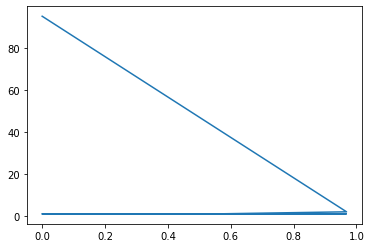

In [32]:
t['LDAPS_CC2'].value_counts().plot.line()

In [33]:
t['LDAPS_CC3'].value_counts()

0.000000e+00    76
5.810000e-07     2
8.680560e-04     2
9.837888e-01     2
2.824154e-01     1
                ..
1.931737e-01     1
1.583397e-01     1
1.600219e-01     1
1.120541e-02     1
7.488603e-02     1
Name: LDAPS_CC3, Length: 7599, dtype: int64

<AxesSubplot:>

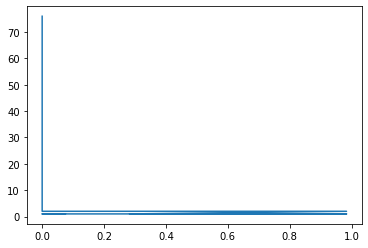

In [34]:
t['LDAPS_CC3'].value_counts().plot.line()

In [35]:
t['LDAPS_CC4'].value_counts()

0.000000    137
0.002604      7
0.005208      3
0.001736      3
0.373025      2
           ... 
0.699422      1
0.748660      1
0.228682      1
0.760407      1
0.306225      1
Name: LDAPS_CC4, Length: 7524, dtype: int64

<AxesSubplot:>

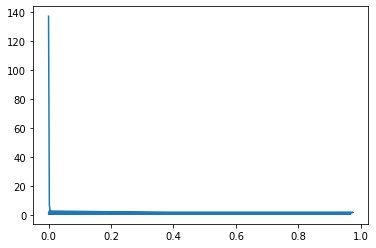

In [36]:
t['LDAPS_CC4'].value_counts().plot.line()

All these above 4 graphs indicates the next day average cloud cover.

* cc1 - first 6 hour --> most of the cloud cover % is 0 only and can see max of >90% as well.
* cc2 - second 6 hour --> most of the cloud cover % is 0 and can see max of  97%.
* cc3 - third 6 hour  --> most have % of 0 and can see max of >.5 to  <.9%
* cc4 - last 6 hour  -->. most have % of 0.

In [37]:
t['LDAPS_PPT1'].value_counts()

0.000000    4844
0.001953      11
0.002604       5
0.001734       3
0.000459       2
            ... 
0.935344       1
6.001337       1
0.083498       1
0.188553       1
1.229075       1
Name: LDAPS_PPT1, Length: 2812, dtype: int64

<AxesSubplot:>

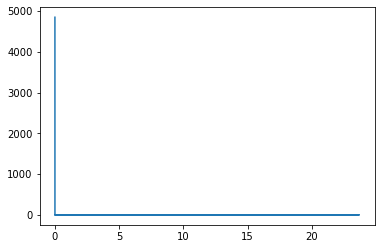

In [38]:
t['LDAPS_PPT1'].value_counts().plot.line()

In [39]:
t['LDAPS_PPT2'].value_counts()

0.000000     5151
0.001953        7
0.000040        3
0.000781        3
21.621661       2
             ... 
0.085236        1
0.041993        1
0.002633        1
0.039292        1
0.109433        1
Name: LDAPS_PPT2, Length: 2510, dtype: int64

<AxesSubplot:>

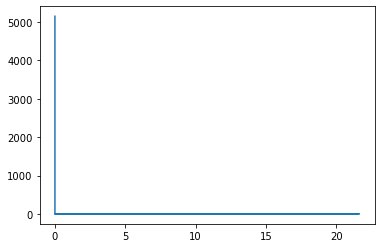

In [40]:
t['LDAPS_PPT2'].value_counts().plot.line()

In [41]:
t['LDAPS_PPT3'].value_counts()

0.000000    5294
0.001953      10
0.000852       4
0.002604       3
0.000864       2
            ... 
0.718585       1
0.041803       1
0.398969       1
0.284441       1
0.527748       1
Name: LDAPS_PPT3, Length: 2356, dtype: int64

<AxesSubplot:>

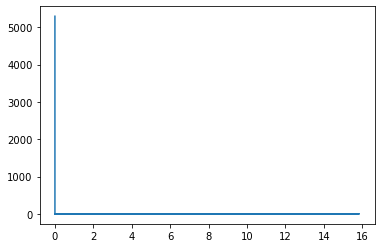

In [42]:
t['LDAPS_PPT3'].value_counts().plot.line()

In [43]:
t['LDAPS_PPT4'].value_counts()

0.000000     5751
0.001953        3
0.001909        2
0.000710        2
16.655469       2
             ... 
5.368769        1
0.113642        1
1.125897        1
0.391944        1
0.787412        1
Name: LDAPS_PPT4, Length: 1918, dtype: int64

<AxesSubplot:>

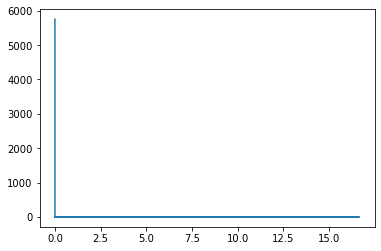

In [44]:
t['LDAPS_PPT4'].value_counts().plot.line()

The same goes for average percipitation where it is splitted for 6 hours * 4 like cloud cover.

* ppt1 --> ranges lies from 0 - 24% and most station has 0%
* ppt2 --> range from 0 - 20%
* ppt3 --> range from 0 - 16%
* ppt4 --> range from 0 -17%

In [45]:
t['lat'].value_counts()

37.5776    1240
37.5507    1240
37.5237     620
37.4697     620
37.5102     620
37.6181     620
37.4967     620
37.6046     620
37.5372     620
37.6450     311
37.4562     311
37.4832     310
Name: lat, dtype: int64

<AxesSubplot:>

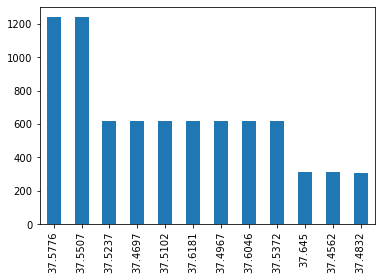

In [46]:
t['lat'].value_counts().plot.bar()

<AxesSubplot:>

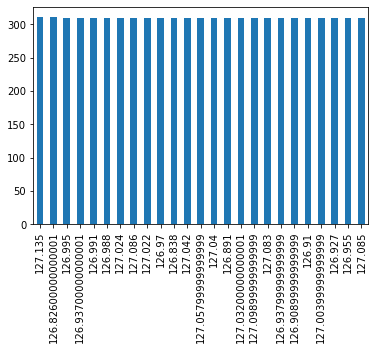

In [47]:
t['lon'].value_counts().plot.bar()

Latitude and Longtitude explains the station place co-ordinates in South Korea.

In [48]:
t['DEM'].value_counts()

12.3700     311
212.3350    311
146.5540    310
82.2912     310
54.6384     310
35.0380     310
17.2956     310
52.5180     310
75.0924     310
15.5876     310
132.1180    310
56.4448     310
21.9668     310
26.2980     310
28.7000     310
33.3068     310
59.8324     310
53.4712     310
50.9312     310
208.5070    310
19.5844     310
30.9680     310
44.7624     310
30.0464     310
45.7160     310
Name: DEM, dtype: int64

<AxesSubplot:>

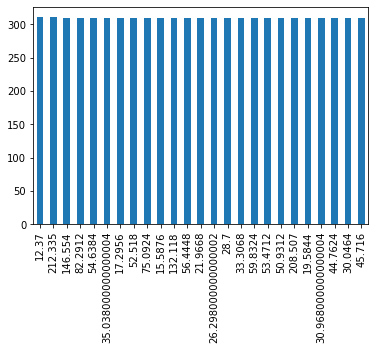

In [49]:
t['DEM'].value_counts().plot.bar()

Elevation is same for almost all places.

In [50]:
t['month'] = pd.DatetimeIndex(t['Date']).month
t['day'] = pd.DatetimeIndex(t['Date']).day
t['year'] = pd.DatetimeIndex(t['Date']).year

As we have date as object data type and model will not understand this kind of data.
Hence splitting into day,month and year.

<AxesSubplot:xlabel='year'>

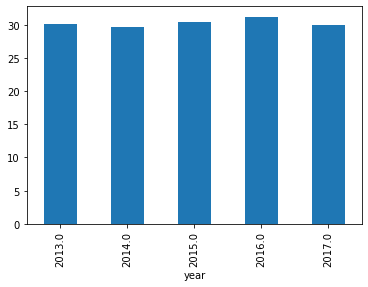

In [51]:
t.groupby('year')['Next_Tmax'].mean().plot.bar()

<AxesSubplot:xlabel='year'>

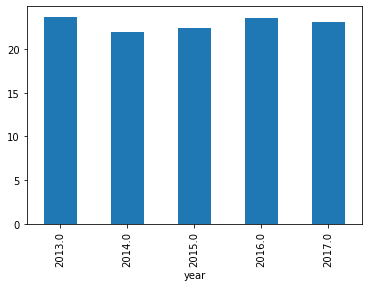

In [52]:
t.groupby('year')['Next_Tmin'].mean().plot.bar()

On Comparing with target variable which is next day minimum / maximum air temperature, we can see that 2016 has high air temperature and in terms of minimum we can see that 2013 and 2016 looks same and almost all year from 2013 - 2017, temperature seems to be same.

There is no much difference but slight on 2014-2015 on minimum air temperature than other years.

<AxesSubplot:xlabel='month'>

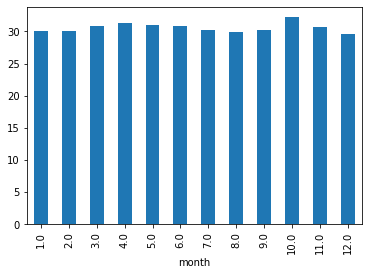

In [53]:
t.groupby('month')['Next_Tmax'].mean().plot.bar()

<AxesSubplot:xlabel='month'>

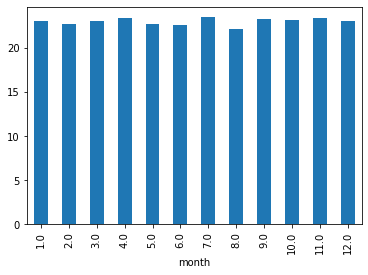

In [54]:
t.groupby('month')['Next_Tmin'].mean().plot.bar()

Comparing the month,Maximum air temperature on next day is having high temperature on month of October(10) than other months but there is no much difference and max air temperature is >30C.

In terms of minimum air temperature on next day, we can see that almost all months looks same than August which is pretty less than others.So the minimum air temperature will be >20C

Dropping the date column as it has been splitted into day,month,year

In [55]:
t = t.drop(columns = ['Date'],axis = 1)
t

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,month,day,year
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2,6.0,30.0,2013.0
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5,6.0,30.0,2013.0
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9,6.0,30.0,2013.0
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3,6.0,30.0,2013.0
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5,6.0,30.0,2013.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1,8.0,30.0,2017.0
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,...,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8,8.0,30.0,2017.0
7749,25.0,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,...,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4,8.0,30.0,2017.0
7750,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3,NaN,NaN,NaN


Replacing NAN values to mean() values and mode () values,

In [56]:
col = ['Present_Tmax','Present_Tmin','LDAPS_RHmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4']
for i in col:
    t[col] = t[col].fillna(t[col].mean())

In [57]:
t['station'] = t['station'].fillna(t['station'].mode()[0])
t['month'] = t['month'].fillna(t['month'].mode()[0])
t['day'] = t['day'].fillna(t['day'].mode()[0])
t['year'] = t['year'].fillna(t['year'].mode()[0])


In [58]:
# checking null values after replacing and we can see target variables have null values,

t.isnull().sum()

station              0
Present_Tmax         0
Present_Tmin         0
LDAPS_RHmin          0
LDAPS_RHmax          0
LDAPS_Tmax_lapse     0
LDAPS_Tmin_lapse     0
LDAPS_WS             0
LDAPS_LH             0
LDAPS_CC1            0
LDAPS_CC2            0
LDAPS_CC3            0
LDAPS_CC4            0
LDAPS_PPT1           0
LDAPS_PPT2           0
LDAPS_PPT3           0
LDAPS_PPT4           0
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
month                0
day                  0
year                 0
dtype: int64

Drpping the target variable NAN rows as it will cause bias to the model.

In [59]:
t['Next_Tmax'] = t['Next_Tmax'].dropna()

In [60]:
t['Next_Tmin'] = t['Next_Tmin'].dropna()

In [61]:
t.isnull().sum()

station              0
Present_Tmax         0
Present_Tmin         0
LDAPS_RHmin          0
LDAPS_RHmax          0
LDAPS_Tmax_lapse     0
LDAPS_Tmin_lapse     0
LDAPS_WS             0
LDAPS_LH             0
LDAPS_CC1            0
LDAPS_CC2            0
LDAPS_CC3            0
LDAPS_CC4            0
LDAPS_PPT1           0
LDAPS_PPT2           0
LDAPS_PPT3           0
LDAPS_PPT4           0
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
month                0
day                  0
year                 0
dtype: int64

In [62]:
t = t.dropna()  # dropping the na values and reset the index
t = t.reset_index(drop = True)

In [63]:
t

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,month,day,year
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2,6.0,30.0,2013.0
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5,6.0,30.0,2013.0
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9,6.0,30.0,2013.0
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3,6.0,30.0,2013.0
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5,6.0,30.0,2013.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7720,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1,8.0,30.0,2017.0
7721,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,...,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8,8.0,30.0,2017.0
7722,25.0,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,...,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4,8.0,30.0,2017.0
7723,1.0,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3,7.0,7.0,2013.0


Now the data looks clean and now we have 7725 rows and 27 columns.

In [64]:
t.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,month,day,year
count,7725.000000,7725.000000,7725.000000,7725.000000,7725.000000,7725.000000,7725.000000,7725.000000,7725.000000,7725.000000,...,7725.000000,7725.000000,7725.000000,7725.000000,7725.000000,7725.000000,7725.000000,7725.000000,7725.000000,7725.000000
mean,13.005049,29.769552,23.224635,56.741576,88.369195,29.616226,23.511815,7.096750,62.468953,0.368485,...,37.544755,126.991370,61.926856,1.258725,5342.066031,30.274887,22.932220,7.079612,16.369061,2014.996893
std,7.215687,2.959205,2.405561,14.583630,7.164028,2.932271,2.333987,2.171835,33.556340,0.261052,...,0.050386,0.079347,54.331701,1.371331,429.235277,3.128010,2.487613,2.238210,8.242621,1.414027
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000,1.000000,7.000000,2013.000000
25%,7.000000,27.800000,21.700000,46.045017,84.291199,27.696185,22.114277,5.686496,37.452979,0.148229,...,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000,7.000000,8.000000,2014.000000
50%,13.000000,29.900000,23.400000,55.266701,89.699196,29.664030,23.733589,6.564141,57.299645,0.319678,...,37.550700,126.995000,45.716000,0.618000,5437.534180,30.500000,23.100000,7.000000,16.000000,2015.000000
75%,19.000000,32.000000,24.900000,66.996681,93.704353,31.687106,25.135301,7.996899,83.897461,0.571547,...,37.577600,127.042000,59.832400,1.767800,5728.624512,32.600000,24.600000,8.000000,24.000000,2016.000000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000,12.000000,31.000000,2017.000000


In [65]:
t.isnull().sum()   # null values has been treated now.

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
month               0
day                 0
year                0
dtype: int64

We will check the correlation between features vs features and features vs target and can see that it looks fine and we will proceed further.

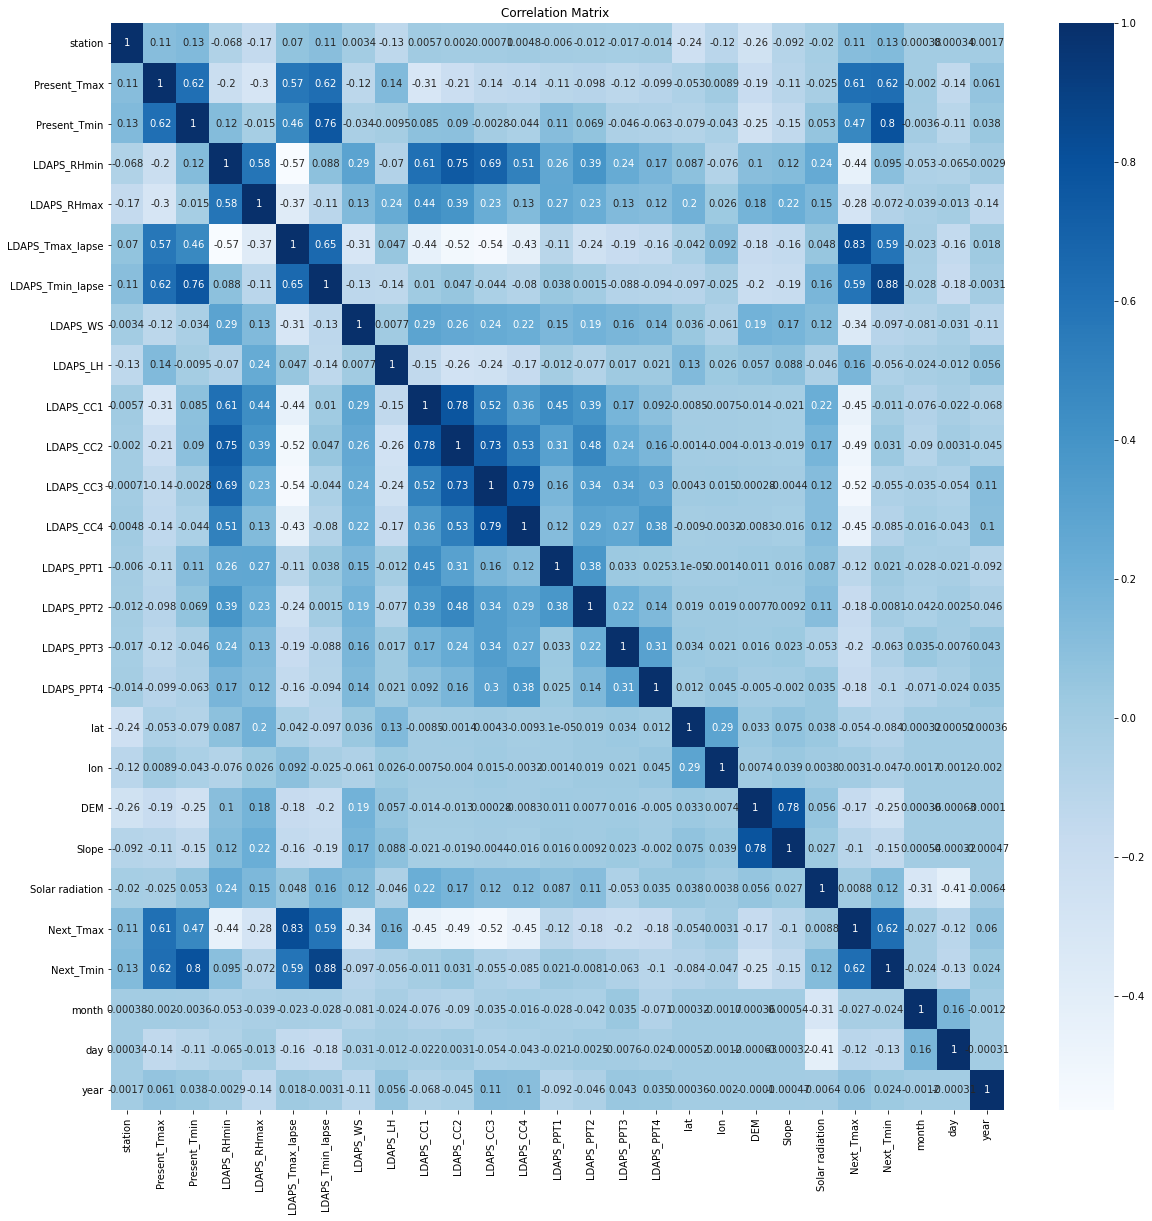

In [66]:
corr = t.corr()
plt.figure(figsize = (20,20))
sns.heatmap(corr,cmap = 'Blues', annot = True)
plt.title("Correlation Matrix ")
plt.show()

We will check the outliers / skewness of the data through dist plot().let's see,

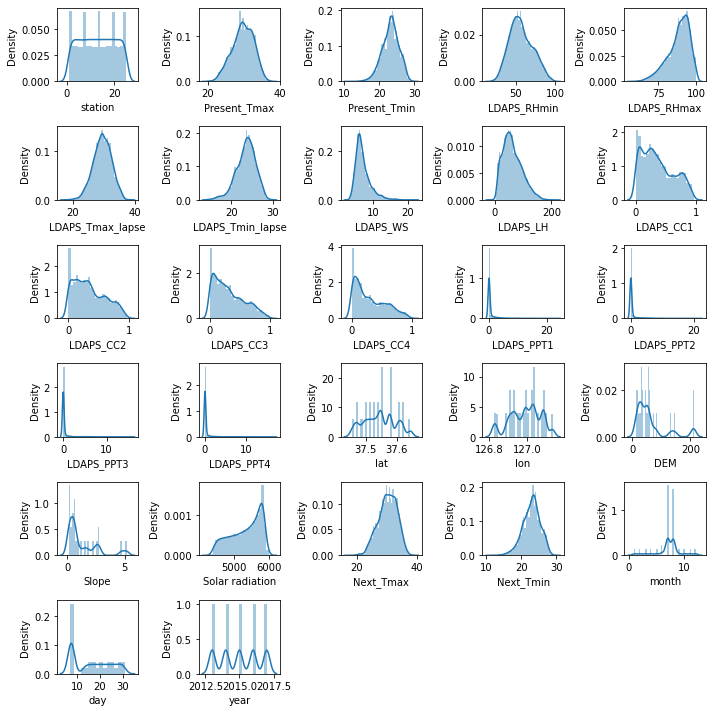

In [67]:
plt.figure(figsize = (10,10))
pltnumber = 1

for column in t:
    if pltnumber<=27:
        ax = plt.subplot(6,5,pltnumber)
        sns.distplot(t[column])
        plt.xlabel(column,fontsize=10)
        pltnumber+=1
plt.tight_layout()

1) LDAPS_PPT1 - 4 has high positive skewness , 

2) humidity max, lapse rate max /min has moderate negative skewness,

3) windspped , heat flux has moderate positive skewness,

4) CC1-4 has moderate positive skewness,

5) month has skewness on both positive and negative,

6) next day max / min air temperature columns has slightly skewed towards left side ie.negative.

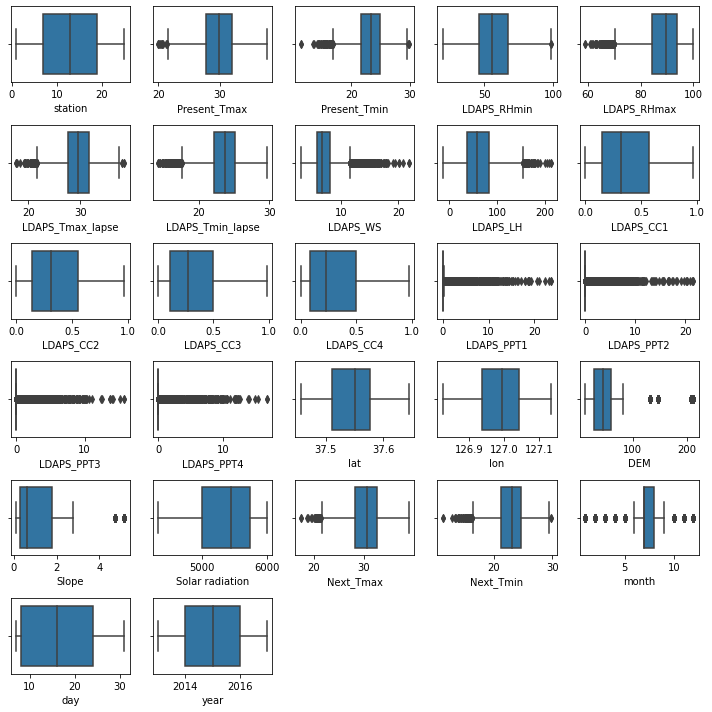

In [68]:
plt.figure(figsize = (10,10))
pltnumber = 1

for column in t:
    if pltnumber<=27:
        ax = plt.subplot(6,5,pltnumber)
        sns.boxplot(t[column])
        plt.xlabel(column,fontsize=10)
        pltnumber+=1
plt.tight_layout()

Tried applying quantile method and z score method for removal of outliers and the data loss % is more than 10 % and it is not applicable.

So removing the skewed data from datset to remove the skewness and that will helps us to perform the model well.

In [69]:
t.skew()

station            -0.002671
Present_Tmax       -0.264750
Present_Tmin       -0.366521
LDAPS_RHmin         0.302959
LDAPS_RHmax        -0.854116
LDAPS_Tmax_lapse   -0.227408
LDAPS_Tmin_lapse   -0.580647
LDAPS_WS            1.581465
LDAPS_LH            0.673019
LDAPS_CC1           0.460552
LDAPS_CC2           0.475215
LDAPS_CC3           0.642222
LDAPS_CC4           0.666281
LDAPS_PPT1          5.399231
LDAPS_PPT2          5.782954
LDAPS_PPT3          6.469458
LDAPS_PPT4          6.833841
lat                 0.086587
lon                -0.286558
DEM                 1.721056
Slope               1.560549
Solar radiation    -0.513787
Next_Tmax          -0.339607
Next_Tmin          -0.403743
month              -0.704300
day                 0.245795
year                0.002471
dtype: float64

Applying Power transform Method to remove the skewness from columns,

In [70]:
from sklearn.preprocessing import power_transform
df = power_transform(t, method ='yeo-johnson')

df= pd.DataFrame(df,columns=t.columns)

In [71]:
# we can see the difference on skewed data % and column lat has 0.00 and so we will drop this 

df.skew()

station            -0.205824
Present_Tmax       -0.035313
Present_Tmin       -0.012386
LDAPS_RHmin        -0.017149
LDAPS_RHmax        -0.115691
LDAPS_Tmax_lapse   -0.009266
LDAPS_Tmin_lapse   -0.017697
LDAPS_WS            0.002231
LDAPS_LH            0.057105
LDAPS_CC1           0.046895
LDAPS_CC2           0.045527
LDAPS_CC3           0.087874
LDAPS_CC4           0.126559
LDAPS_PPT1          1.405602
LDAPS_PPT2          1.578999
LDAPS_PPT3          1.748489
LDAPS_PPT4          1.960554
lat                 0.000000
lon                -0.199755
DEM                 0.039634
Slope               0.233811
Solar radiation    -0.177610
Next_Tmax          -0.039261
Next_Tmin          -0.014544
month               0.044197
day                -0.041666
year                0.000345
dtype: float64

So the skewness has been reduced to a greater extent, we will drop the lat column and proceed to next steps.

In [72]:
df = df.sample(frac = 1)  # shuffling the data for better prediction

Splitting X and Y variables,

In [73]:
X = df.drop(columns = ['Next_Tmax','lat'],axis = 1)
y = df['Next_Tmax']

As we have values in different ranges like C,m/s,Wm2 and so on.So in order to equalize the range of values,We will scale the data for better accuracy of model.

In [74]:
scaler = StandardScaler()
x_sc = scaler.fit_transform(X)

Train Test Split

In [75]:
x_train,x_test,y_train,y_test = train_test_split(x_sc,y, test_size = 0.20, random_state = 111)

All the data pre processing,cleaning has done,let's build a model with various algorithms to check which model is best fit.

Here I have used the below regression models for this problem,
1) Support Vector Regressor
2) Random Forest Regressor
3) Linear Regression
4) Ada Boost Regressor
5) Gradient Boost Regressor


Also I am using cross validation score for all models to check whether my model is over-fitting or under-fitting

Model 1: Support Vector Regressor

In [76]:
from sklearn.svm import SVR

svm = SVR()
svm.fit(x_train,y_train)
y_pred = svm.predict(x_test)
scr_svm = cross_val_score(svm,x_sc,y,cv=5)

print("r2_Score", r2_score(y_test,y_pred))
print("CV Score", scr_svm.mean())
print("MSE",metrics.mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("Train Score", svm.score(x_train,y_train))
print("Test Score", svm.score(x_test,y_test))

r2_Score 0.9315781429963792
CV Score 0.9288743812773067
MSE 0.06986782860077563
RMSE 0.2643252326221915
Train Score 0.9549448708366395
Test Score 0.9315781429963792


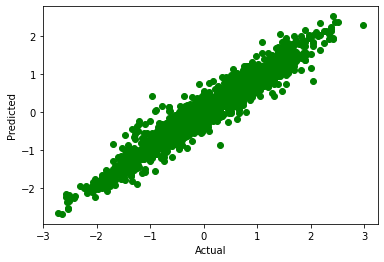

In [77]:
plt.scatter(y_test,y_pred, color = 'green')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

SVR model has accuracy after cross validation score of 93% and we can see that best fit line is linear and distance between residuals and line are less.

Model 2: Random Forest Regressor

In [79]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
y_pred = rfr.predict(x_test)
scr_rfr = cross_val_score(rfr,x_sc,y,cv=5)

print("r2_Score", r2_score(y_test,y_pred))
print("CV Score", scr_rfr.mean())
print("MSE",metrics.mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("Train Score", rfr.score(x_train,y_train))
print("Test Score", rfr.score(x_test,y_test))

r2_Score 0.9131039448682704
CV Score 0.913436067013173
MSE 0.08873244533111611
RMSE 0.29787991763648003
Train Score 0.9877441669581082
Test Score 0.9131039448682704


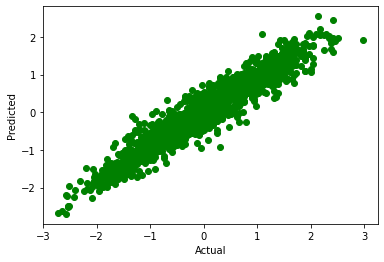

In [80]:
plt.scatter(y_test,y_pred, color = 'green')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

Random forest model has accuracy after cross validation score of 91% and we can see that best fit line is linear and distance between residuals and line are less 

Model 3: Linear Regression

In [81]:
from sklearn.linear_model import LinearRegression

lin = LinearRegression()
lin.fit(x_train,y_train)
y_pred = lin.predict(x_test)
scr_lin = cross_val_score(lin,x_sc,y,cv=5)

print("r2_Score", r2_score(y_test,y_pred))
print("CV Score", scr_lin.mean())
print("MSE",metrics.mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("Train Score", lin.score(x_train,y_train))
print("Test Score", lin.score(x_test,y_test))

r2_Score 0.7842457686965576
CV Score 0.7907919911830004
MSE 0.2203138048679868
RMSE 0.4693759738929836
Train Score 0.7948239387073023
Test Score 0.7842457686965576


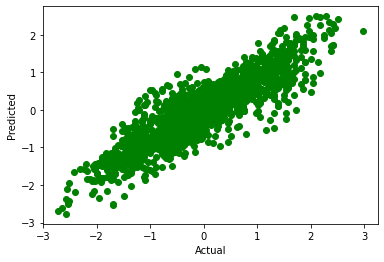

In [82]:
plt.scatter(y_test,y_pred, color = 'green')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

Linear Regression model has accuracy after cross validation score of 79% and we can see that best fit line is linear and distance between residuals and line are little high than other 2 models - random forest and svr.

Model 4: Ada Boost Regressor

In [83]:
from sklearn.ensemble import AdaBoostRegressor

abr = AdaBoostRegressor()
abr.fit(x_train,y_train)
y_pred = abr.predict(x_test)
scr_abr = cross_val_score(abr,x_sc,y,cv=5)

print("r2_Score", r2_score(y_test,y_pred))
print("CV Score", scr_abr.mean())
print("MSE",metrics.mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("Train Score", abr.score(x_train,y_train))
print("Test Score", abr.score(x_test,y_test))

r2_Score 0.7594250711690194
CV Score 0.7613987705215839
MSE 0.24565904272836758
RMSE 0.495640033419787
Train Score 0.7629071543931377
Test Score 0.7594250711690194


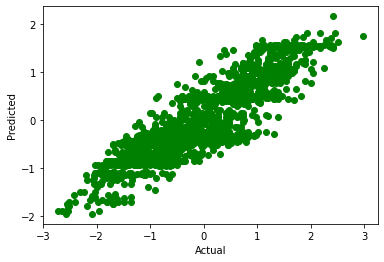

In [84]:
plt.scatter(y_test,y_pred , color = 'green')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

Ada boost model has accuracy after cross validation score of 76% and we can see that best fit line is linear and distance between residuals and line are slightly more.

Model 5: Gradient Boost Regressor

In [85]:
from sklearn.ensemble import GradientBoostingRegressor 
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)
y_pred = gbr.predict(x_test)
scr_gbr = cross_val_score(gbr,x_sc,y,cv=5)

print("r2_Score", r2_score(y_test,y_pred))
print("CV Score", scr_gbr.mean())
print("MSE",metrics.mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("Train Score", gbr.score(x_train,y_train))
print("Test Score", gbr.score(x_test,y_test))

r2_Score 0.8652819056061659
CV Score 0.8632305495798007
MSE 0.13756511648073821
RMSE 0.3708977170066408
Train Score 0.885961655908306
Test Score 0.8652819056061659


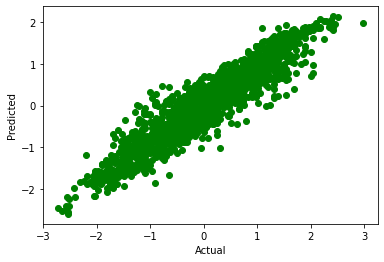

In [86]:
plt.scatter(y_test,y_pred, color = 'green')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

Gradient Boost model has accuracy after cross validation score of 86.3% and we can see that best fit line is linear and distance between residuals and line are less.

Comparing Cross val score with accuracy score of model, "RANDOM FOREST" is the best model as it is having less difference of 0.03 and the model which is having less difference is considered as best model.

Applying Hyper parameter tuning to the best model to check the accuracy score,

In [153]:
param = {'n_estimators': [100], 'criterion':['mse'], 'max_depth':[2,4,6,8,10,12], 'min_samples_split':[2], 'min_samples_leaf':[1],
      'max_leaf_nodes':[3,6,9,12,15],'random_state':[None],
          'max_samples':[2,4,6,8,10,12,]
        }

In [154]:
gs = GridSearchCV(rfr,param_grid = param, cv=5)

In [155]:
gs.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse'],
                         'max_depth': [2, 4, 6, 8, 10, 12],
                         'max_leaf_nodes': [3, 6, 9, 12, 15],
                         'max_samples': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1], 'min_samples_split': [2],
                         'n_estimators': [100], 'random_state': [None]})

In [156]:
gs.best_params_

{'criterion': 'mse',
 'max_depth': 6,
 'max_leaf_nodes': 6,
 'max_samples': 12,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100,
 'random_state': None}

In [236]:
final = RandomForestRegressor(n_estimators = 100, max_depth=65 , criterion = 'mse', 
                              min_samples_split = 18, max_leaf_nodes=85, max_samples= 666 ,random_state=644 )
final.fit(x_train,y_train)
y_pred = final.predict(x_test)

print("r2_Score", r2_score(y_test,y_pred))
print("MSE",metrics.mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("Train Score", final.score(x_train,y_train))
print("Test Score", final.score(x_test,y_test))

r2_Score 0.8318624661399266
MSE 0.17169081506324868
RMSE 0.41435590385953075
Train Score 0.854346644502267
Test Score 0.8318624661399266


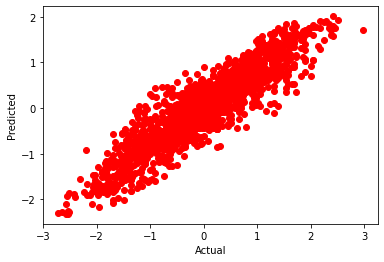

In [237]:
plt.scatter(y_test,y_pred, color = 'red')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

We got the accuracy of 84% and on by adding new parameters, our model will improve with good accuracy as well as the model is taking lot of time to execute fit() method

Getting the actual and predicted values,

In [238]:
fin = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
fin.head(15)

,Actual,Predicted
6687,0.943617,1.145142
1662,-0.559240,-0.050462
4108,0.551785,0.299839
940,1.238663,0.785617
2098,-1.087211,-0.841591
3366,1.465550,1.370666
445,-0.915794,-0.585128
266,-1.495940,-1.057826
617,0.378951,0.009280
317,-1.281460,-1.029608


Saving the model

In [239]:
import joblib
joblib.dump(final,"max_temp.pkl")

['max_temp.pkl']

-----------------------------------------------  NEXT TARGET VARIABLE ------------------------------------------

As we have two target variable,Let's build a model with another variable,

In [249]:
df

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,month,day,year
2708,0.075939,-0.209452,-0.911474,-0.978922,0.034549,0.384580,-0.321537,-1.157501,-1.027786,-0.687768,...,0.0,1.169260,0.440379,1.283112,-0.925795,0.447691,-0.240639,0.364585,0.043987,-0.704540
6635,-1.273245,0.237508,0.100779,0.881015,1.524475,0.338902,-0.297477,0.387870,1.401428,-1.223311,...,0.0,0.368940,0.083907,1.233934,0.747056,1.697261,0.648380,-0.125254,0.387924,1.415673
3640,0.958290,-0.175760,0.057829,0.188050,0.830370,0.066493,0.122965,-0.188235,0.791247,-0.054032,...,0.0,0.138031,1.470797,1.688794,0.848314,0.447691,0.693069,-0.125254,0.688545,0.003209
6262,-1.273245,-0.637017,-0.561767,0.463480,1.789807,0.288018,-0.552826,0.318940,2.156760,1.290106,...,0.0,0.368940,0.083907,1.233934,1.295321,0.763529,0.341577,-1.728233,-1.255254,1.415673
893,1.077377,0.486222,1.098149,0.546410,-0.596387,0.577681,1.854607,0.461322,-1.354275,-0.524726,...,0.0,0.602222,-0.722616,-0.281260,-0.209183,-0.279728,0.828430,-1.386034,-1.044056,-1.413304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3720,-1.646575,-1.521069,0.057829,1.021436,0.840032,-0.517860,0.205811,-0.115147,-0.635926,1.571263,...,0.0,0.498246,0.055006,-0.387036,0.417472,-0.216197,-0.037484,-0.125254,1.039398,0.003209
3777,-0.336896,-0.637017,-0.195548,0.155163,0.054692,-0.168699,-0.205963,-0.723650,0.332355,-0.814231,...,0.0,-0.478716,1.816596,1.741480,0.264619,-0.022498,0.128857,-0.125254,1.197928,0.003209
3130,-0.336896,-1.578494,-1.387691,-1.919428,0.739607,-1.062777,-1.889936,1.245727,-0.061187,-1.369064,...,0.0,-0.478716,1.816596,1.741480,1.464323,-1.143340,-1.417031,-2.270605,-1.255254,0.003209
2542,1.195038,0.307994,-0.561767,-1.312843,-1.625100,0.390419,-0.909582,1.523860,1.449000,-1.640287,...,0.0,1.209340,-1.007140,-1.356023,-0.484850,0.516955,0.003782,0.364585,-1.044056,-0.704540


In [256]:
df = df.sample(frac = 1)

Splitting X and y

In [257]:
x = df.drop(columns = ['Next_Tmin','lat'],axis = 1)
y = df['Next_Tmin']

Scaling the data in-order to equalize the range from 0 to 1 as our dataset has values of C,m/s,wm2 and % values.

In [258]:
scaler = StandardScaler()
x_sc = scaler.fit_transform(x)

Train Test Split

In [259]:
x_train,x_test,y_train,y_test = train_test_split(x_sc,y, test_size = 0.20, random_state = 333)

I am using the below alogorithms to build the models and check which is best model.

1) Support Vector Regressor 
2) Random Forest Regressor 
3) Linear Regression 
4) Ada Boost Regressor 
5) Gradient Boost Regressor

Also I am using cross validation score for all models to check whether my model is over-fitting or under-fitting

Model 1: Support Vector Regressor

In [260]:
from sklearn.svm import SVR

svm = SVR()
svm.fit(x_train,y_train)
y_pred = svm.predict(x_test)
scr_svm = cross_val_score(svm,x_sc,y,cv=5)

print("r2_Score", r2_score(y_test,y_pred))
print("CV Score", scr_svm.mean())
print("MSE",metrics.mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("Train Score", svm.score(x_train,y_train))
print("Test Score", svm.score(x_test,y_test))

r2_Score 0.9426364118747871
CV Score 0.9381641121901317
MSE 0.0564190842058085
RMSE 0.2375270178438834
Train Score 0.961123626626605
Test Score 0.9426364118747871


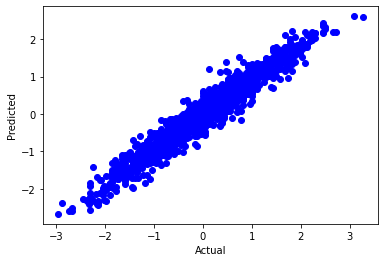

In [261]:
plt.scatter(y_test,y_pred, color = 'blue')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

SVR model has accuracy of 94 % after chceking cross validation score and the above scatter plot shows that line is linear and distance between best fit line and residuals(error) are less and that proves the model is good.

Model 2: Random Forest Regressor

In [262]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
y_pred = rfr.predict(x_test)
scr_rfr = cross_val_score(rfr,x_sc,y,cv=5)

print("r2_Score", r2_score(y_test,y_pred))
print("CV Score", scr_rfr.mean())
print("MSE",metrics.mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("Train Score", rfr.score(x_train,y_train))
print("Test Score", rfr.score(x_test,y_test))

r2_Score 0.9174976820850452
CV Score 0.9143169642725345
MSE 0.08114389935751497
RMSE 0.284857682637339
Train Score 0.9879082520275424
Test Score 0.9174976820850452


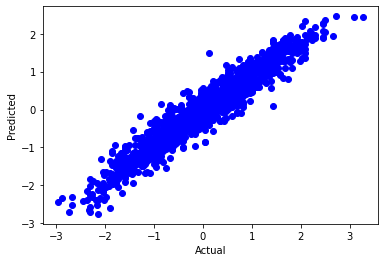

In [263]:
plt.scatter(y_test,y_pred, color = 'blue')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

Random Forest Regressor model has the accuracy of 91% after cross val score applied and the above scatter plot shows that it is linear and best fit line and residuals distance are less.

Model 3: Linear Regression

In [264]:
from sklearn.linear_model import LinearRegression

lin = LinearRegression()
lin.fit(x_train,y_train)
y_pred = lin.predict(x_test)
scr_lin = cross_val_score(lin,x_sc,y,cv=5)

print("r2_Score", r2_score(y_test,y_pred))
print("CV Score", scr_lin.mean())
print("MSE",metrics.mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("Train Score", lin.score(x_train,y_train))
print("Test Score", lin.score(x_test,y_test))

r2_Score 0.8427701961252816
CV Score 0.8464142354203741
MSE 0.15464098105417404
RMSE 0.39324417485091123
Train Score 0.8488507499266453
Test Score 0.8427701961252816


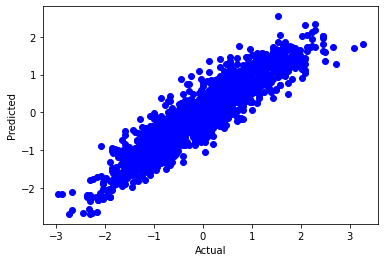

In [265]:
plt.scatter(y_test,y_pred, color = 'blue')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

Accuracy score for Linear regression is 85% on cross val score and scatter plot shows linear but the best fit line and residuals distance are less and also can see some points are little far than other 2 models - random forest and SVR.

Model 4: Ada Boost Regressor

In [266]:
from sklearn.ensemble import AdaBoostRegressor

abr = AdaBoostRegressor()
abr.fit(x_train,y_train)
y_pred = abr.predict(x_test)
scr_abr = cross_val_score(abr,x_sc,y,cv=5)

print("r2_Score", r2_score(y_test,y_pred))
print("CV Score", scr_abr.mean())
print("MSE",metrics.mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("Train Score", abr.score(x_train,y_train))
print("Test Score", abr.score(x_test,y_test))

r2_Score 0.8154060532936318
CV Score 0.8185191096885669
MSE 0.18155456733940942
RMSE 0.4260922052084612
Train Score 0.8280998828136455
Test Score 0.8154060532936318


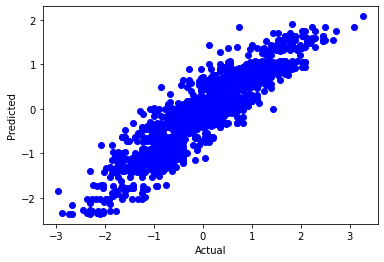

In [267]:
plt.scatter(y_test,y_pred, color = 'blue')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

Above Ada Boost Regfressor shows the accuracy of 82% and plot is linear and can see some wider points from best fit line and residuals.

Model 5: Gradient Boost Regressor

In [268]:
from sklearn.ensemble import GradientBoostingRegressor 
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)
y_pred = gbr.predict(x_test)
scr_gbr = cross_val_score(gbr,x_sc,y,cv=5)

print("r2_Score", r2_score(y_test,y_pred))
print("CV Score", scr_gbr.mean())
print("MSE",metrics.mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("Train Score", gbr.score(x_train,y_train))
print("Test Score", gbr.score(x_test,y_test))

r2_Score 0.8982692990000194
CV Score 0.8956060060028133
MSE 0.10005568294482509
RMSE 0.31631579623032596
Train Score 0.9134263732469821
Test Score 0.8982692990000194


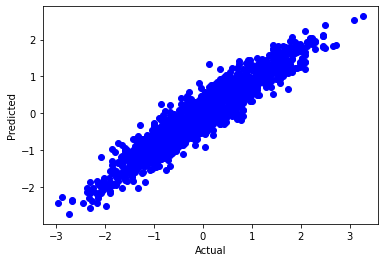

In [269]:
plt.scatter(y_test,y_pred, color = 'blue')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

Gradient Boost Regressor got the accuracy of 90% and it is good and also from thr above plot,it is linear.

Comparing Cross val score with accuracy score of model, "RANDOM FOREST" is the best model as it is having less difference of 0.03 and the model which is having less difference is considered as best model.

Applying Hyper parameter tuning to increase the accuracy of the model,

In [276]:
param = {'n_estimators': [100], 'criterion':['mse'], 'max_depth':[2,4,6,8,10,12], 'min_samples_split':[2], 'min_samples_leaf':[1],
      'max_leaf_nodes':[3,6,9,12,15],'random_state':[None],
          'max_samples':[2,4,6,8,10,12,]
        }

In [277]:
ggs = GridSearchCV(rfr,param_grid = param,cv= 5)

In [278]:
ggs.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse'],
                         'max_depth': [2, 4, 6, 8, 10, 12],
                         'max_leaf_nodes': [3, 6, 9, 12, 15],
                         'max_samples': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1], 'min_samples_split': [2],
                         'n_estimators': [100], 'random_state': [None]})

In [279]:
ggs.best_params_

{'criterion': 'mse',
 'max_depth': 4,
 'max_leaf_nodes': 6,
 'max_samples': 12,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100,
 'random_state': None}

In [293]:
fin = RandomForestRegressor(n_estimators = 100,max_depth=75 , criterion = 'mse', 
                              min_samples_split = 25, max_leaf_nodes=95, max_samples= 660 ,random_state=686)
fin.fit(x_train,y_train)
y_pred = fin.predict(x_test)

print("r2_Score", r2_score(y_test,y_pred))
print("MSE",metrics.mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("Train Score", fin.score(x_train,y_train))
print("Test Score", fin.score(x_test,y_test))

r2_Score 0.8518034161339562
MSE 0.1457564949720526
RMSE 0.3817806896269802
Train Score 0.8683480274927365
Test Score 0.8518034161339562


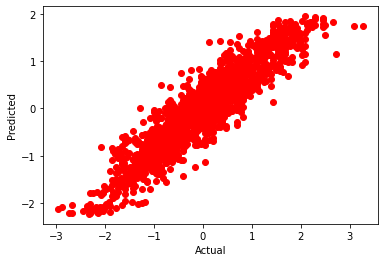

In [295]:
plt.scatter(y_test,y_pred, color = 'red')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

As per the final accuracy, we can see the model accuracy is 85% and based on parameters and the values,We will get a accuracy more as well. 

Based on scatter plot, we can see that plot is linear and the distance between best fit line and residuals are kind of less.

Getting the actual and predicted values,

In [296]:
final = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
final.head(15)    

,Actual,Predicted
4185,-0.119381,0.099153
5755,1.293719,0.922796
3024,-0.892054,-1.381073
1878,-0.160012,-0.314967
2971,-1.646273,-1.640406
7159,0.255849,0.461929
4546,-1.483545,-1.249396
7526,0.737974,0.777852
4060,0.003782,0.201553
2446,0.919752,0.530760


Saving the Model 

In [297]:
import joblib
joblib.dump(fin,"min_temp.pkl")

['min_temp.pkl']

## Conclusion:

    * As we have 2 target variables , next day minimum temperature and next day maximum temperature
    
        Next day Minimum Temp accuracy score is 85%  and Next day Maximum Temp accuracy score is 84%